In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [66]:
# creating database connection
conn = sqlite3.connect('/content/drive/MyDrive/P1_VendorPerformance/inventory.db')

In [6]:
# Featching vendor summary data:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## Exploratory Data Analysis
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [6]:
#summary statistics
df.describe().T    #T = Transpose the dataset.

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


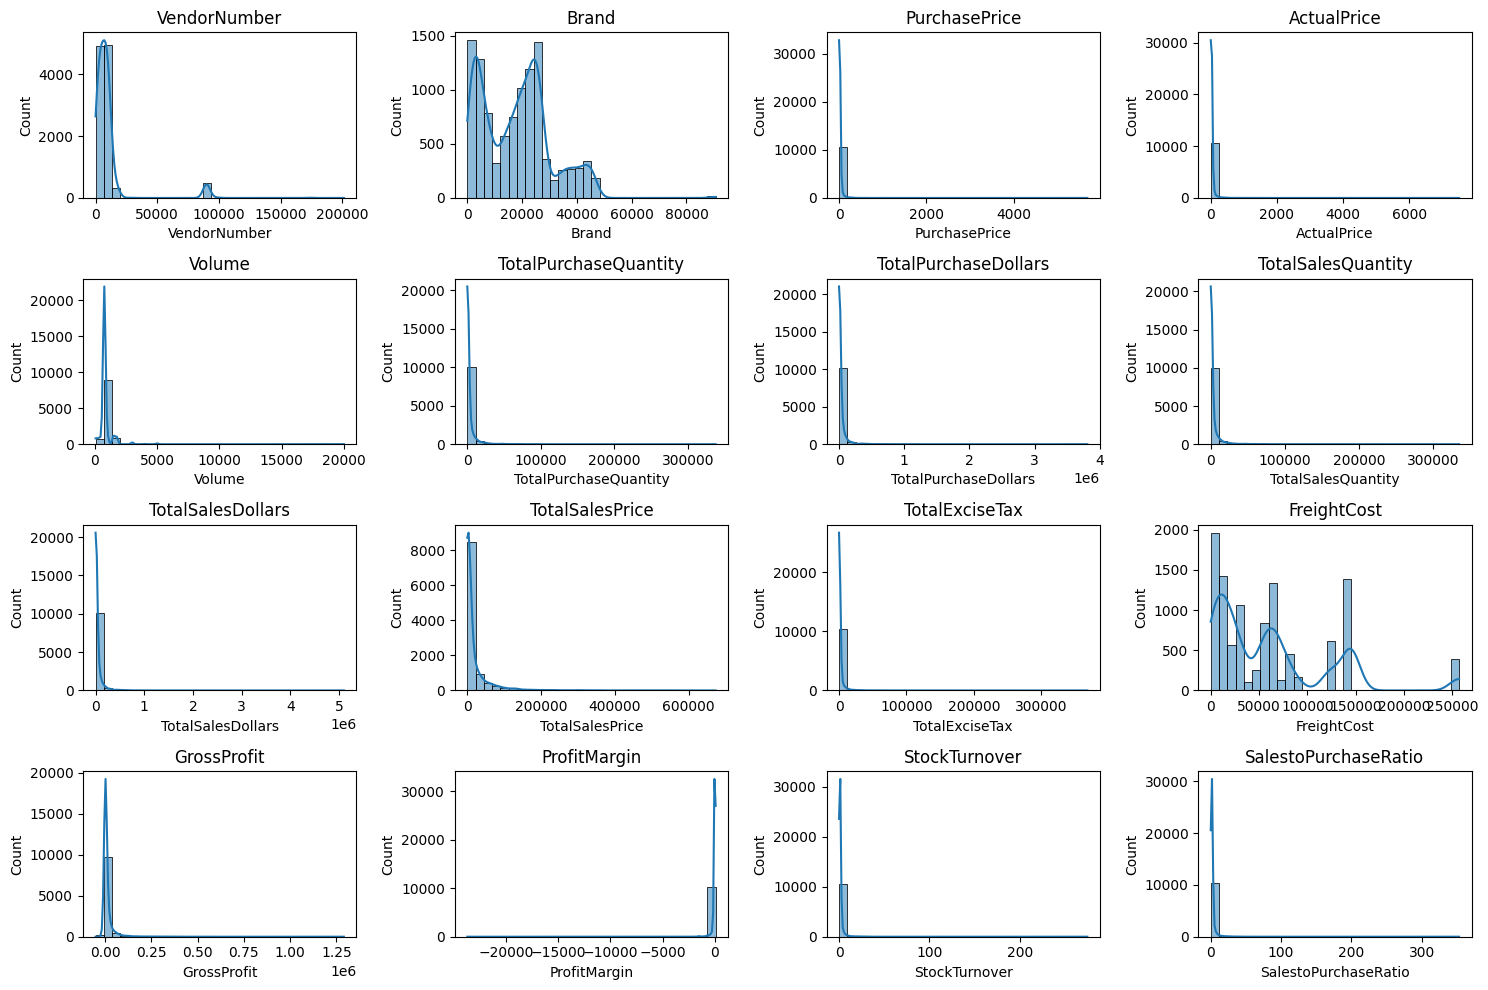

In [7]:
# Distribution Plots for Numerical Columns:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

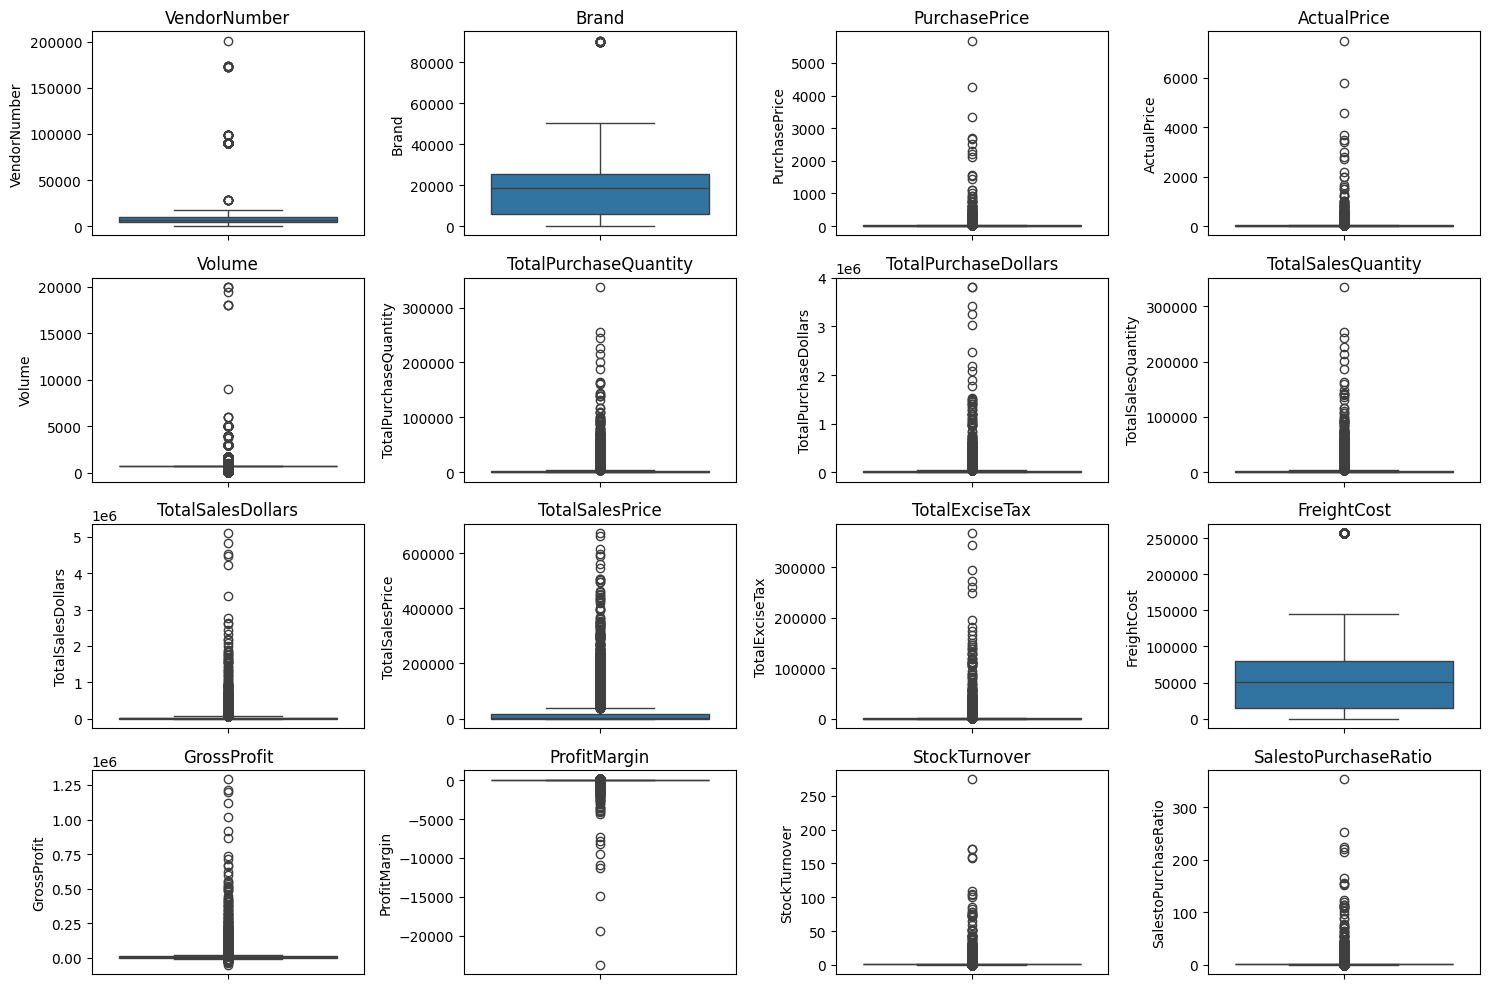

In [8]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Summary Statistics Insights:
##### Negative & Zero Values:
- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high COStS or selling at discounts lower than the purchase price..
    
- Profit Margin: Has a minimum of -∞, which suggests cqses where revenue is zero or even lower than costs.
    
- Total Sales Quantity & Sales Dollars: Minimum values are O, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.
    
##### Outliers Indicated by High Standard Deviations:
- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
    
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
    
- Turnover: Ranges from O to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
# Now filter the data by removing inconsistancies:
df = pd.read_sql_query("""
SELECT *
    FROM vendor_sales_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0
""", conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


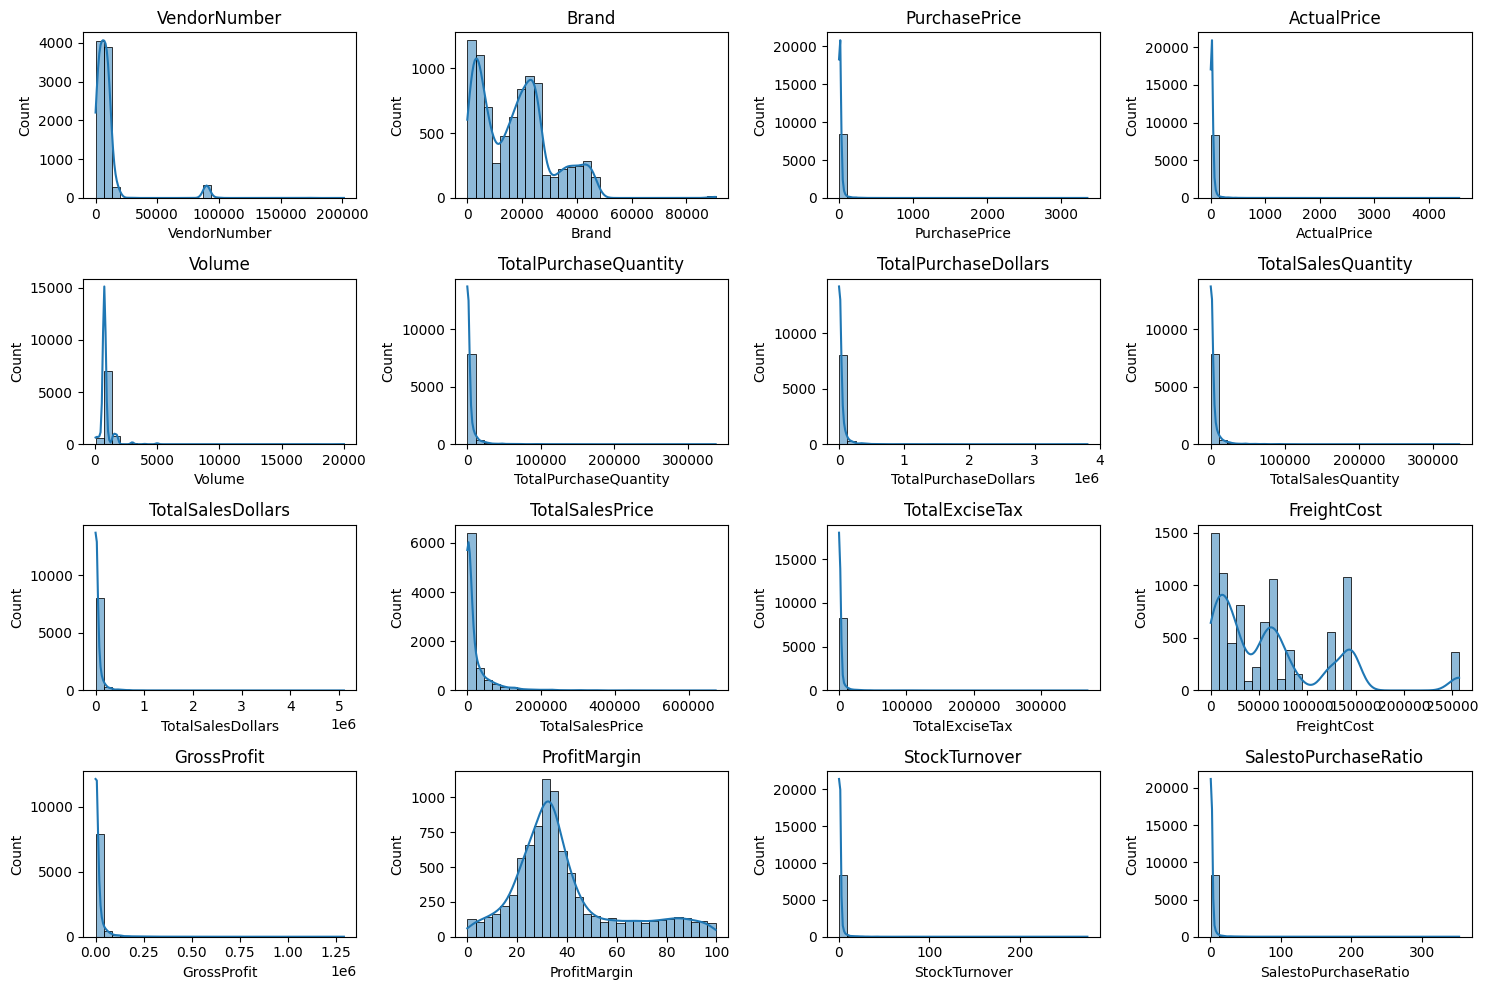

In [10]:
# Distribution Plots for Numerical Columns:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

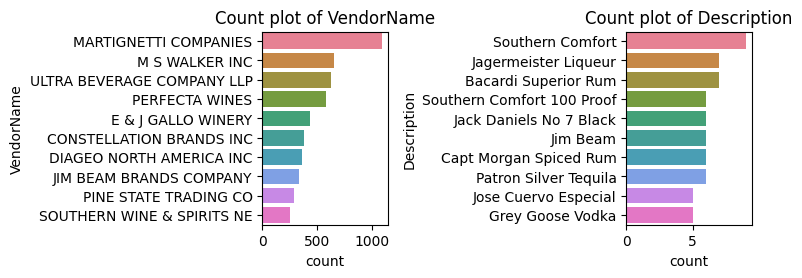

In [11]:
#Count Plot
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(15,10))

for i,col in enumerate(categorical_cols):
  plt.subplot(4,4,i + 1)
  palette = sns.color_palette("husl", n_colors=10)
  sns.countplot(y=df[col], order=df[col].value_counts().index[:10],palette=palette)
  plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

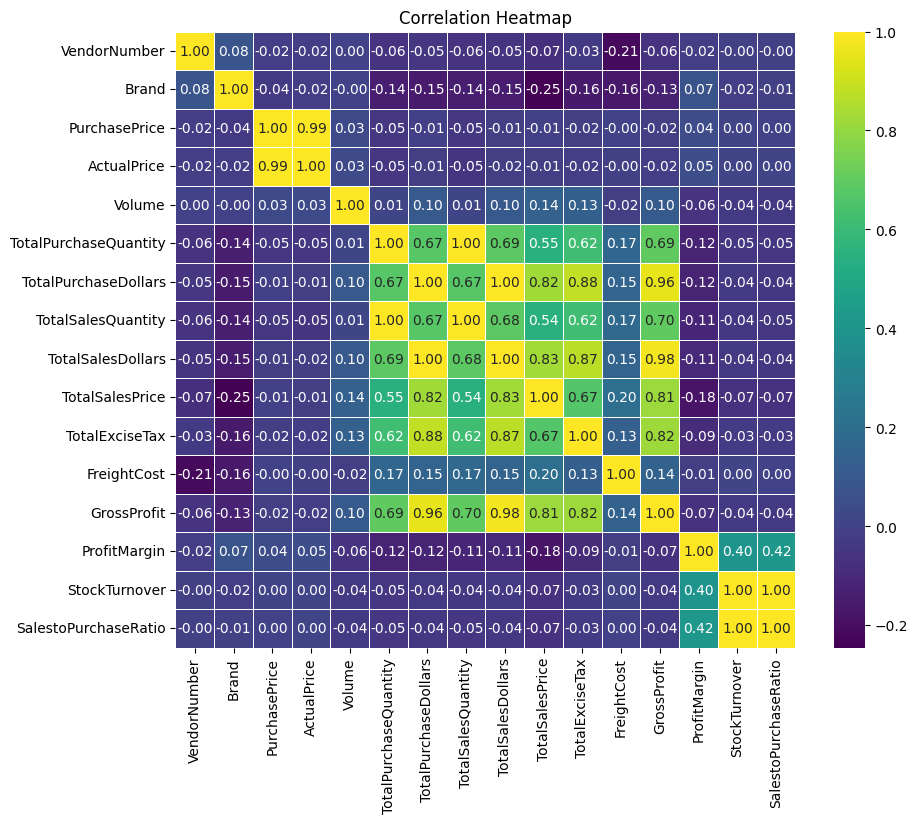

In [12]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
     
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Aanalyis
##### Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [18]:
print(low_sales_threshold)
print(high_margin_threshold)

560.299
64.97017552750111


We have to target brands which is higher than 41.4 and less than 342 for promotional purpose.

In [19]:
#Filter brands with low sales but high profit margins
target_brands=brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
    (brand_performance['ProfitMargin']>=high_margin_threshold)
]
print("***** Brands with low sales but high profit margins *****")
display(target_brands.sort_values('TotalSalesDollars'))

***** Brands with low sales but high profit margins *****


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


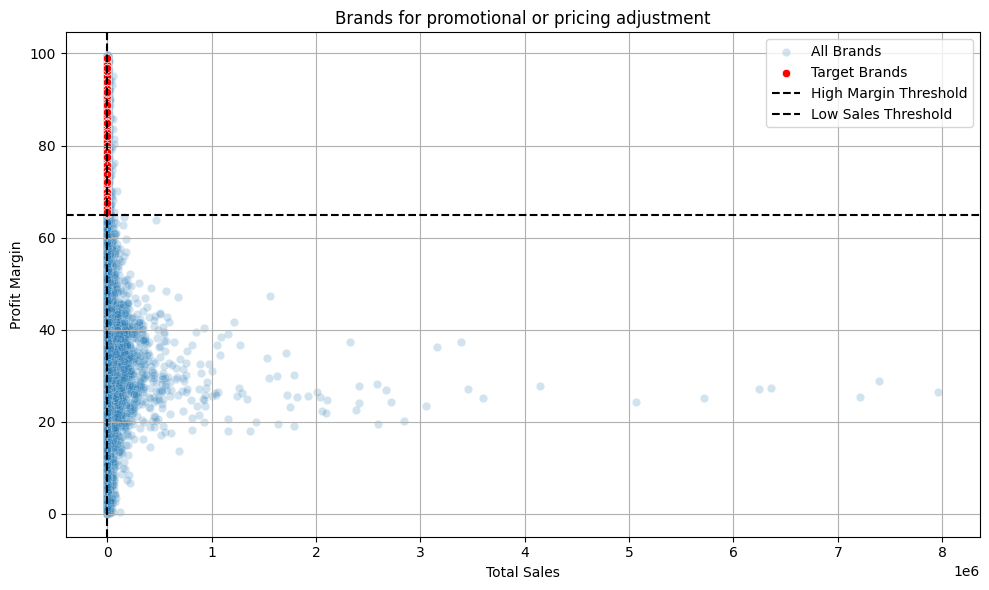

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',label='Target Brands',color='red')

plt.axhline(high_margin_threshold,color='black',linestyle='--',label='High Margin Threshold')
plt.axvline(low_sales_threshold,color='black',linestyle='--',label='Low Sales Threshold')

plt.title("Brands for promotional or pricing adjustment")
plt.xlabel("Total Sales")
plt.ylabel("Profit Margin")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

In [21]:
brand_performance = brand_performance[brand_performance[ 'TotalSalesDollars'] <10000] # for better visualization

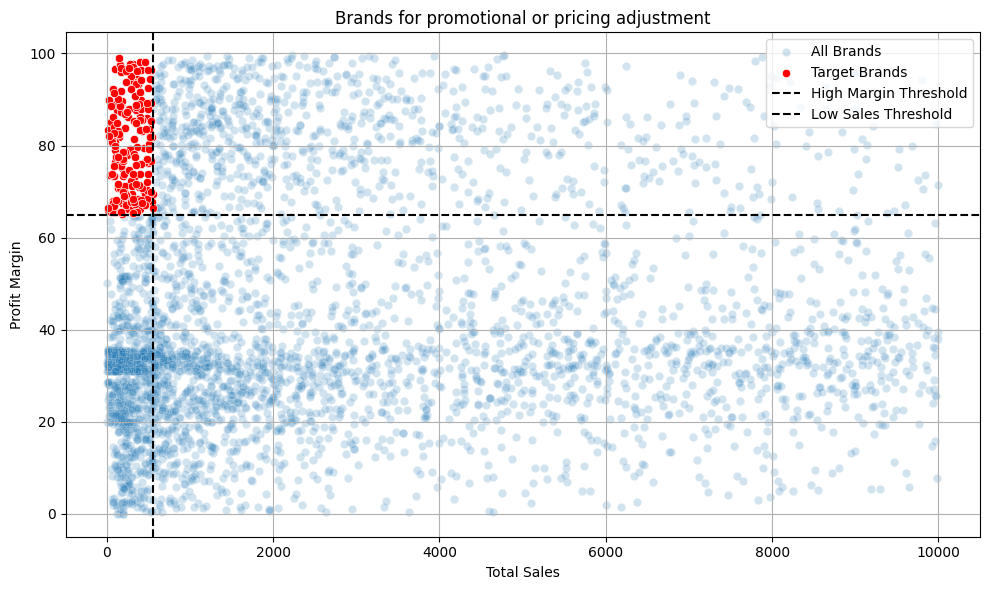

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',label='Target Brands',color='red')

plt.axhline(high_margin_threshold,color='black',linestyle='--',label='High Margin Threshold')
plt.axvline(low_sales_threshold,color='black',linestyle='--',label='Low Sales Threshold')

plt.title("Brands for promotional or pricing adjustment")
plt.xlabel("Total Sales")
plt.ylabel("Profit Margin")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

##### Which vendors and brands demonstrate the highest sales performance?

In [23]:
#Converts lakh and millions to K and M format.
def format_dollar(num):
    if abs(num) >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif abs(num) >= 1_000:
        return f'{num / 1_000:.1f}K'
    else:
        return f'{num:.2f}'

In [24]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [25]:
top_vendors.apply(lambda x: format_dollar(x))

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,68.0M
MARTIGNETTI COMPANIES,39.3M
PERNOD RICARD USA,32.1M
JIM BEAM BRANDS COMPANY,31.4M
BACARDI USA INC,24.9M
CONSTELLATION BRANDS INC,24.2M
E & J GALLO WINERY,18.4M
BROWN-FORMAN CORP,18.2M
ULTRA BEVERAGE COMPANY LLP,16.5M


In [26]:
top_brands.apply(lambda x: format_dollar(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,8.0M
Tito's Handmade Vodka,7.4M
Grey Goose Vodka,7.2M
Capt Morgan Spiced Rum,6.4M
Absolut 80 Proof,6.2M
Jameson Irish Whiskey,5.7M
Ketel One Vodka,5.1M
Baileys Irish Cream,4.2M
Kahlua,3.6M


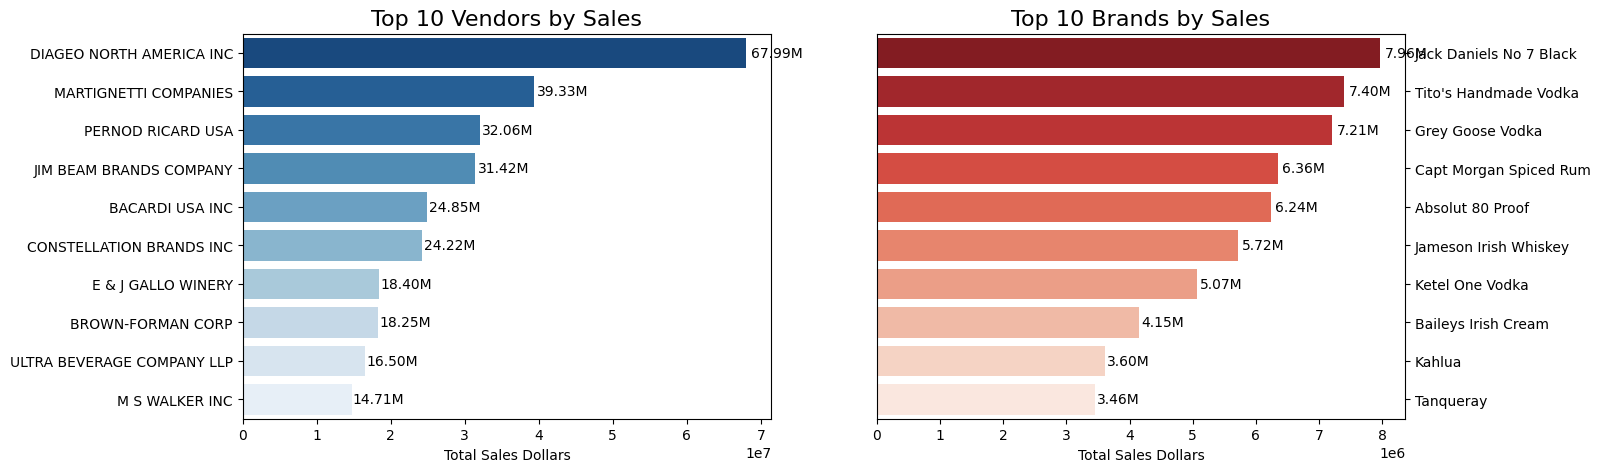

In [27]:
# Plots for top vendors and top brands:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot 1: Top 10 Vendors
vendor_plot = sns.barplot(x=top_vendors.values, y=top_vendors.index, ax=ax1, palette='Blues_r', orient='h')
ax1.set_title('Top 10 Vendors by Sales', fontsize=16)
ax1.set_xlabel('Total Sales Dollars')
ax1.set_ylabel('')

# Add data labels to the vendor bars
for p in vendor_plot.patches:
    width = p.get_width()
    ax1.text(width * 1.01,
             p.get_y() + p.get_height() / 2,
             f'{width / 1e6:.2f}M',
             va='center')

# Plot 2: Top 10 Brands
brand_plot = sns.barplot(x=top_brands.values, y=top_brands.index, ax=ax2, palette='Reds_r', orient='h')
ax2.set_title('Top 10 Brands by Sales', fontsize=16)
ax2.set_xlabel('Total Sales Dollars')
ax2.set_ylabel('')
ax2.yaxis.tick_right()

# Add data labels to the brand bars
for p in brand_plot.patches:
    width = p.get_width()
    ax2.text(width * 1.01,
             p.get_y() + p.get_height() / 2,
             f'{width / 1e6:.2f}M',
             va='center')

plt.tight_layout#(pad=3.0)
plt.show()

##### Which vendors contribute the most to Total Purchase Dollars?

In [28]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [30]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008361
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912073
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693182


In [31]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [32]:
#Display top 10 vendors
top_vendors = vendor_performance.head(10).reset_index()
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollar)
top_vendors

,index,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,25,DIAGEO NORTH AMERICA INC,50.1M,17.9M,68.0M,16.30
1,57,MARTIGNETTI COMPANIES,25.5M,13.8M,39.3M,8.30
2,68,PERNOD RICARD USA,23.9M,8.2M,32.1M,7.76
3,46,JIM BEAM BRANDS COMPANY,23.5M,7.9M,31.4M,7.64
4,6,BACARDI USA INC,17.4M,7.4M,24.9M,5.67
5,20,CONSTELLATION BRANDS INC,15.3M,8.9M,24.2M,4.97
6,11,BROWN-FORMAN CORP,13.2M,5.0M,18.2M,4.31
7,30,E & J GALLO WINERY,12.1M,6.3M,18.4M,3.93
8,106,ULTRA BEVERAGE COMPANY LLP,11.2M,5.3M,16.5M,3.63
9,53,M S WALKER INC,9.8M,4.9M,14.7M,3.18


In [33]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [34]:
top_vendors['CumulativeContribution%'] = vendor_performance['PurchaseContribution%'].cumsum()
top_vendors

,index,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
0,25,DIAGEO NORTH AMERICA INC,50.1M,17.9M,68.0M,16.30,99.99
1,57,MARTIGNETTI COMPANIES,25.5M,13.8M,39.3M,8.30,99.92
2,68,PERNOD RICARD USA,23.9M,8.2M,32.1M,7.76,99.99
3,46,JIM BEAM BRANDS COMPANY,23.5M,7.9M,31.4M,7.64,99.99
4,6,BACARDI USA INC,17.4M,7.4M,24.9M,5.67,99.46
5,20,CONSTELLATION BRANDS INC,15.3M,8.9M,24.2M,4.97,99.85
6,11,BROWN-FORMAN CORP,13.2M,5.0M,18.2M,4.31,45.67
7,30,E & J GALLO WINERY,12.1M,6.3M,18.4M,3.93,94.86
8,106,ULTRA BEVERAGE COMPANY LLP,11.2M,5.3M,16.5M,3.63,99.99
9,53,M S WALKER INC,9.8M,4.9M,14.7M,3.18,99.99


In [35]:
vendor_performance.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'PurchaseContribution%'],
      dtype='object')

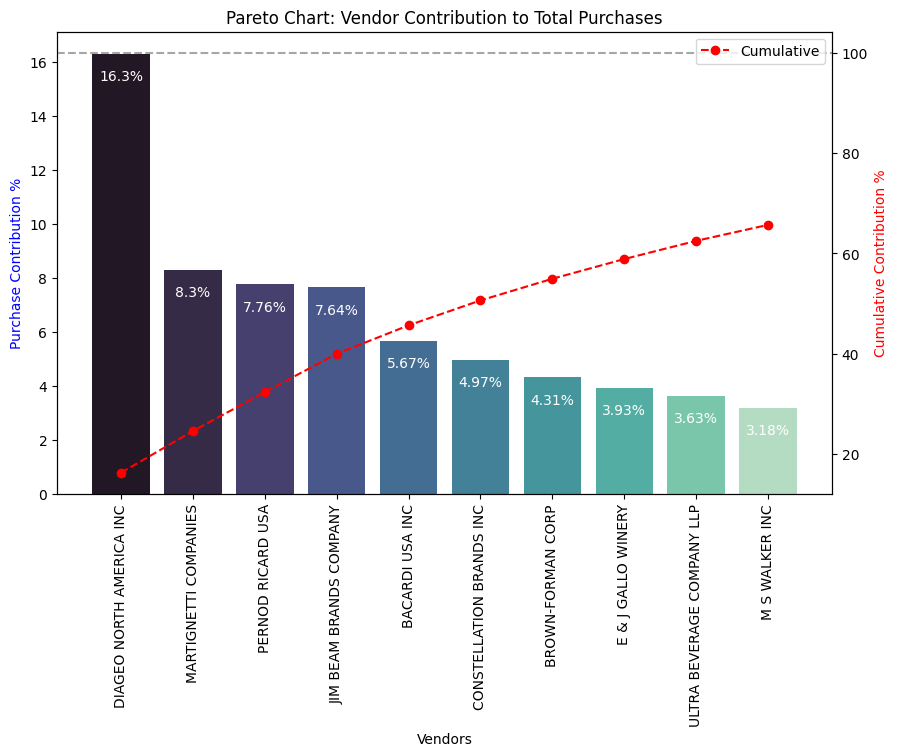

In [36]:
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    # This line is changed to format the value to 2 decimal places
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

##### How much of total procurement is dependent on top vendors?

In [37]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


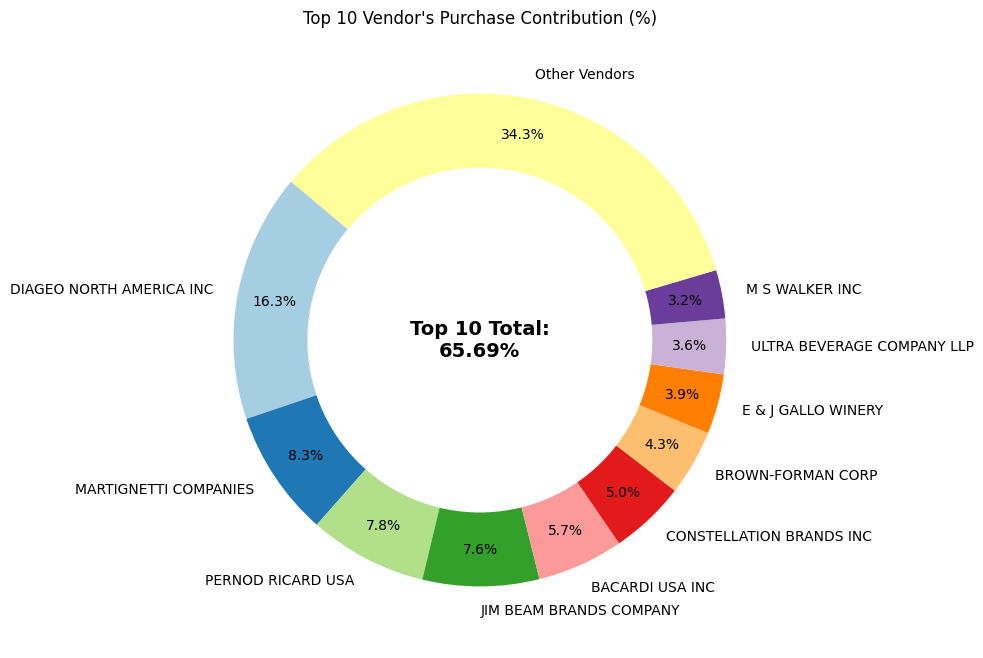

In [38]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

##### Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost saving?

In [39]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [40]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


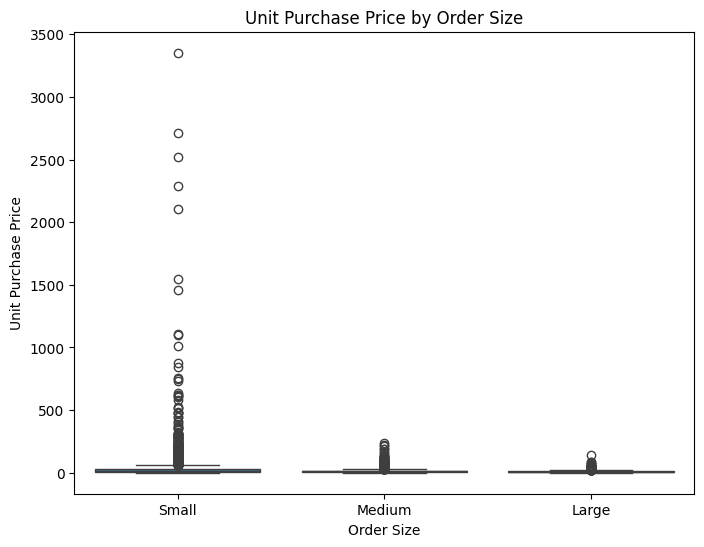

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df, order=['Small', 'Medium', 'Large'])
plt.title("Unit Purchase Price by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

- The price difference between Small and Large orders is substantial (—72% reduction in unit cost).

- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

##### This states the higher the order size lesser the Unit Purchase Price. Thus, bulk pricing stratergies encourage vendors to purchase items in large volumes.


##### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [42]:
df[df['StockTurnover'] < 1].groupby('VendorName')['StockTurnover'].mean().sort_values(ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


##### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [43]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollar(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.7M


In [44]:
# Aggregate Capital Locked per Vendor:
inventory_value_Per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital:
inventory_value_Per_vendor = inventory_value_Per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_Per_vendor['UnsoldInventoryValue'] = inventory_value_Per_vendor['UnsoldInventoryValue'].apply(format_dollar)
inventory_value_Per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.2K
46,JIM BEAM BRANDS COMPANY,554.7K
68,PERNOD RICARD USA,470.6K
116,WILLIAM GRANT & SONS INC,402.0K
30,E & J GALLO WINERY,228.3K
79,SAZERAC CO INC,198.4K
11,BROWN-FORMAN CORP,177.7K
20,CONSTELLATION BRANDS INC,133.6K
61,MOET HENNESSY USA INC,126.5K
77,REMY COINTREAU USA INC,118.6K


##### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [45]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)

In [46]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]["ProfitMargin"].dropna()

In [47]:
top_vendors

,ProfitMargin
0,25.297693
1,21.062810
2,24.675786
3,27.139908
4,28.412764
...,...
3523,79.684817
3681,85.782102
4751,93.085860
4920,95.012530


In [48]:
low_vendors

,ProfitMargin
5631,4.111764
5652,6.145626
5701,12.007271
5704,1.677308
5724,7.239599
...,...
8560,83.448276
8561,96.436186
8562,25.252525
8563,98.974037


In [49]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61, Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62, Mean: 41.55


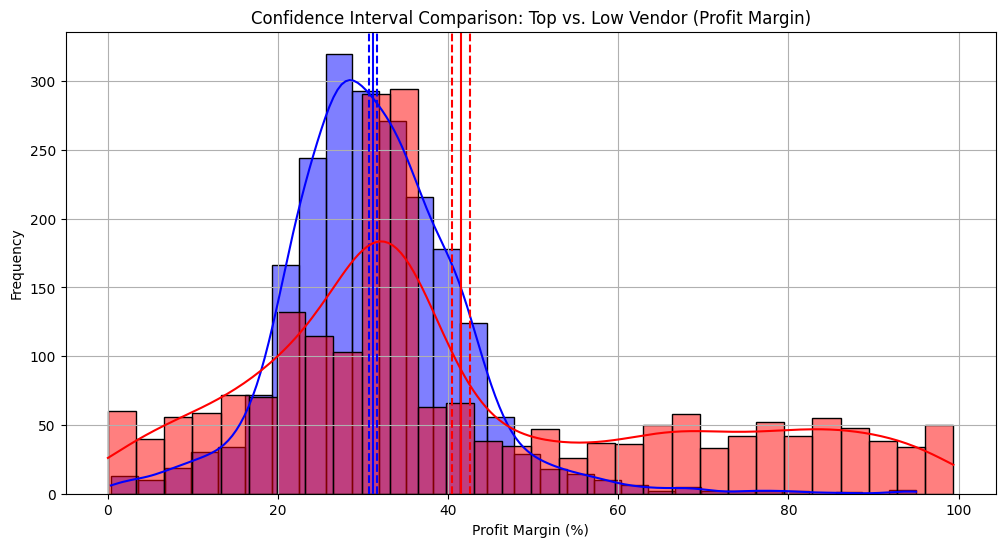

In [50]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendor Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Lower: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Lower: {top_mean:.2f}")

# Low Vendor Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Top Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Top Lower: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Top Lower: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendor (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- The confidence interval for vendors (40.44% to 42.62%) is significantly higher than that of vendors (30.74% to 31.61%).
                                       
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
                                       
- For High-performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
                                       
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

##### Is there a significant difference in profit margins between top-performing and low-performing vendors?
- Hypothesis:

> H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
>

> H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [51]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test:
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, p_value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low—performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6440, p_value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low—performing vendors.


In [68]:
# creating database connection
conn = sqlite3.connect('/content/drive/MyDrive/P1_VendorPerformance/inventory.db')

In [69]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)
print("Total tables:", len(tables))

Tables in the database: [('end_inventory',), ('begin_inventory',), ('purchase_prices',), ('purchases',), ('vendor_invoice',), ('sales',), ('vendor_sales_summary',)]
Total tables: 7


In [70]:
# Save to database as tables
brand_performance.to_sql("BrandPerformance", conn, if_exists="replace", index=False)
low_vendors.to_frame(name="ProfitMargin").to_sql("LowTurnoverVendor", conn, if_exists="replace", index=False)

2142

In [71]:
import pandas as pd

# Convert to DataFrame with percentages
PurchaseContribution = pd.DataFrame({
    "Vendor": vendors,
    "ContributionPercent": purchase_contributions
})

# Save to database
PurchaseContribution.to_sql("PurchaseContribution", conn, if_exists="replace", index=False)

11

In [72]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('end_inventory',), ('begin_inventory',), ('purchase_prices',), ('purchases',), ('vendor_invoice',), ('sales',), ('vendor_sales_summary',), ('BrandPerformance',), ('LowTurnoverVendor',), ('PurchaseContribution',)]


In [73]:
BrandPerformance = pd.read_sql_query("SELECT * FROM BrandPerformance", conn)
LowTurnoverVendor = pd.read_sql_query("SELECT * FROM LowTurnoverVendor", conn)
PurchaseContribution = pd.read_sql_query("SELECT * FROM PurchaseContribution", conn)

vendor_sales_summary = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

In [74]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("Tables in DB:", tables)

Tables in DB:                    name
0         end_inventory
1       begin_inventory
2       purchase_prices
3             purchases
4        vendor_invoice
5                 sales
6  vendor_sales_summary
7      BrandPerformance
8     LowTurnoverVendor
9  PurchaseContribution


In [75]:
BrandPerformance.to_csv("BrandPerformance.csv", index=False)
LowTurnoverVendor.to_csv("LowTurnoverVendor.csv", index=False)
PurchaseContribution.to_csv("PurchaseContribution.csv", index=False)

vendor_sales_summary.to_csv("vendor_sales_summary.csv", index=False)